ValueError: could not convert string to float: .*Miss\..*

<function __main__.f>

ValueError: cannot find widget or abbreviation for argument: 'x'

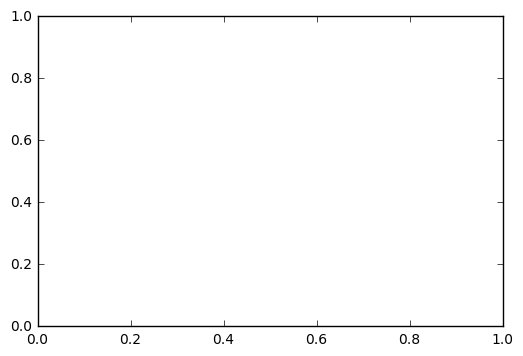

In [108]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import widgets
from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

def excel_to_df(f):
    return pd.read_excel(f)

def get_match_count(pattern, col):
    counter = 0
    regex = re.compile(pattern)
    for val in col.values:
        match = regex.match(val)
        if match != None:
            counter += 1
    return counter

class pattern_data:
    def __init__(self, data_set, col_name):
        self.data_set = data_set
        self.col_name = col_name
        self.col = data_set[col_name]
        self.length = self.col.size
        self.storage = pd.DataFrame(columns = ['pattern', 'counter'])
        
    def add_count(self, pattern):
        counter = get_match_count(pattern, self.col)
        row = pd.DataFrame(data = [[pattern, counter]], columns = ['pattern', 'counter'])
        self.storage = self.storage.append(row, ignore_index = True)
        
    def clear_data(self):
        self.storage = pd.DataFrame(columns = ['pattern', 'counter'])
    
    def plt_data(self):
        objects = self.storage['pattern']
        x_vals = np.arange(objects.size)
        heights = self.storage['counter']
        width = .8

        plt.bar(x_vals, heights, align='center', width = width, alpha=0.5)
        plt.xticks(x_vals, objects)
        plt.ylabel('number of instances')
        plt.title('Pattern')
        
        num_vals = np.ones(objects.size)*self.length
        plt.bar(x_vals, num_vals, align= 'center', width = width, color='b', alpha=0.1)
        
        plt.show()

def create_series(data_set, col_name):
    return data_set[col_name]
        
def add_count(storage, pattern, series):
    counter = get_match_count(pattern, series)
    row = pd.DataFrame(data = [[pattern, counter]], columns = ['pattern', 'counter'])
    return storage.append(row, ignore_index = True)

def get_count(p1,p2,series):
    c1 = get_match_count(p1, series)
    c2 = get_match_count(p2, series)
    storage = pd.DataFrame(data = [[c1,p1],[c2,p2]], columns = ['pattern', 'counter'])
    return storage

def clear_data(storage):
    return pd.DataFrame(columns = ['pattern', 'counter'])

def plt_data(storage):
    objects = storage['pattern']
    x_vals =  np.arange(objects.size)
    heights = storage['counter']
    width = .8

    plt.bar(x_vals, heights, align='center', width = width, alpha=0.5)
    plt.xticks(x_vals, objects)
    plt.ylabel('number of instances')
    plt.title('Pattern')

    #num_vals = np.ones(objects.size)*self.length
    #plt.bar(x_vals, num_vals, align= 'center', width = width, color='b', alpha=0.1)
    plt.show()

def on_button_clicked(pattern_data):
    pattern_data.plt_data()
    

df = excel_to_df('titanic3.xlsx')

pattern = ".*Miss\..*"
storage = pd.DataFrame(columns = ['pattern', 'counter'])
series = create_series(df, 'name')

obj = pattern_data(df, 'name')
obj.add_count(".*Miss\..*")
obj.add_count(".*Mr\..*")


def f(x,y=''):
    storage = get_count(x ,y, series)
    plt_data(storage)

i1 = interact(f, x=widgets.Text(value = ".*Miss\..*" ))
display(i1)
i2 = interact(f, y=widgets.Text(value = ".*Mr\..*" ))
display(i2)
